<a href="https://colab.research.google.com/github/vanshbaba/Data-science/blob/main/04_27_22_Github_Task_for_Assessment_3_By_Vansh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from  numpy import*
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
penguins = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/penguins.csv")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [ ]:
# Covariance

print('Covariance:')
penguins.cov()

Covariance:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.807054,-2.534234,50.375765,2605.591912
bill_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [ ]:
print('Correlation:')
penguins.corr()

Correlation:


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [ ]:
# missing= missing_values_table(penguins)
# missing

In [ ]:
# Handling missing values

from sklearn.impute import SimpleImputer
#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
penguins.iloc[:,:] = imputer.fit_transform(penguins)

In [ ]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
penguins["sex"] = le.fit_transform(penguins["sex"])
penguins['sex'][:5]

0    1
1    0
2    0
3    1
4    0
Name: sex, dtype: int64

In [ ]:
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

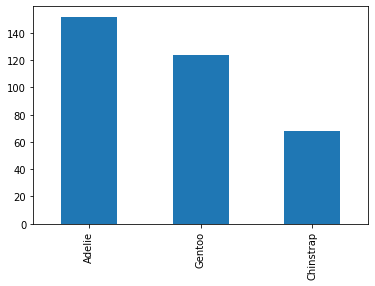

In [ ]:
penguins['species'].value_counts().plot(kind='bar')

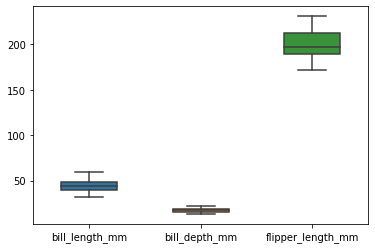

In [ ]:
df1 = penguins[['bill_length_mm', 'bill_depth_mm','flipper_length_mm']]
sns.boxplot(data=df1, width=0.5,fliersize=5)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


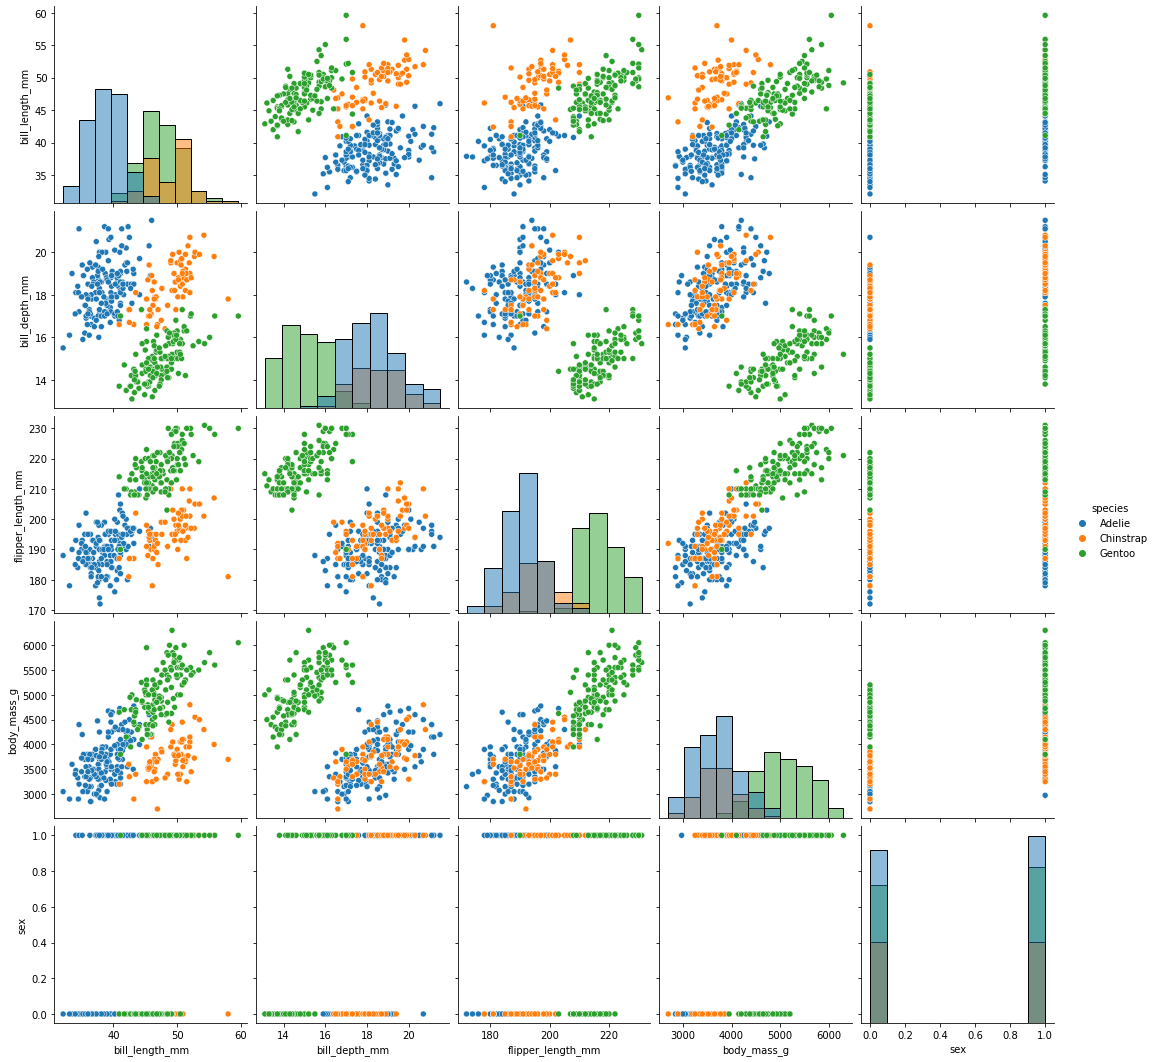

In [ ]:
sns.pairplot(penguins, hue="species", size=3,diag_kind="hist")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


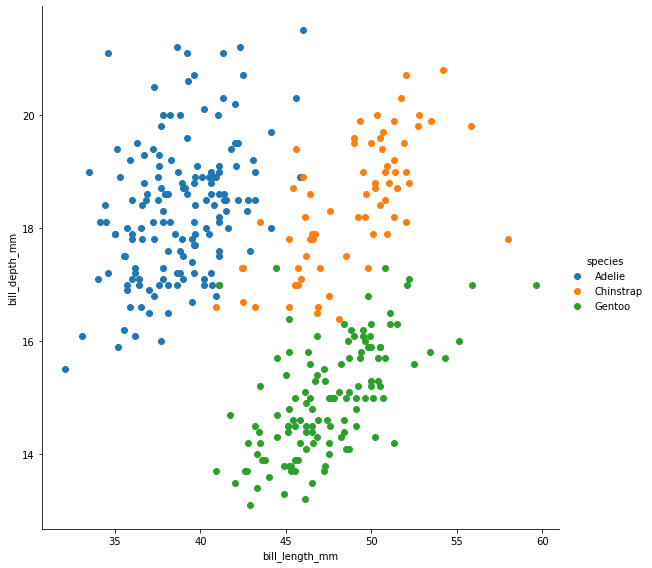

In [ ]:
sns.FacetGrid(penguins, hue="species", size=8) \
   .map(plt.scatter, "bill_length_mm", "bill_depth_mm") \
   .add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


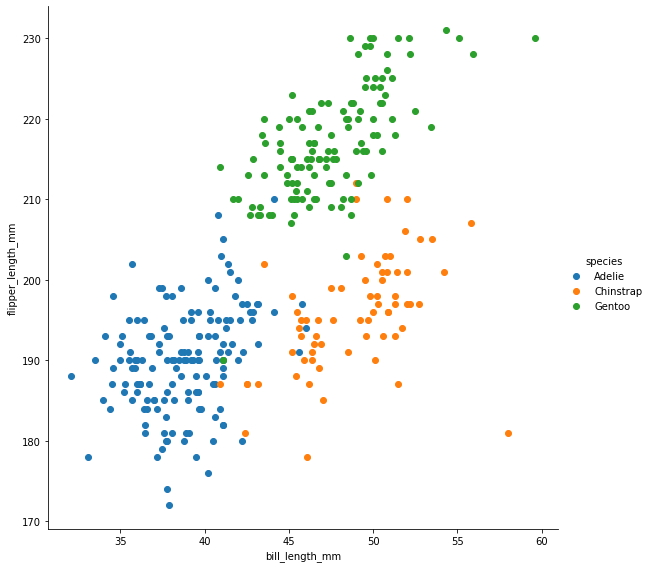

In [ ]:
sns.FacetGrid(penguins, hue="species", size=8) \
   .map(plt.scatter, "bill_length_mm", "flipper_length_mm") \
   .add_legend()

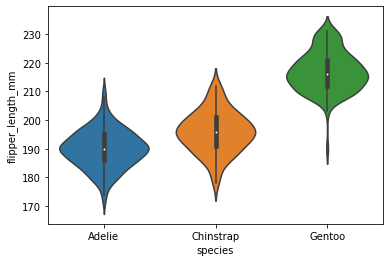

In [ ]:
ax = sns.violinplot(x="species", y="flipper_length_mm", data=penguins,size=8)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


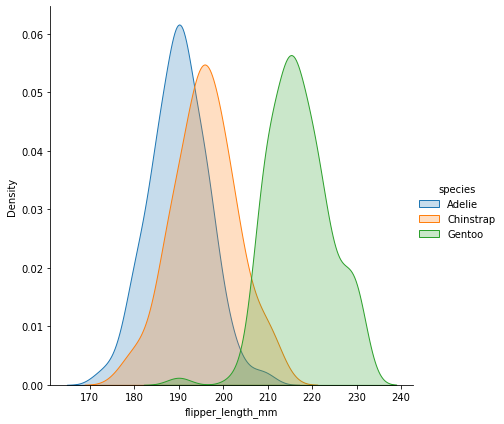

In [ ]:
sns.FacetGrid(penguins, hue="species", size=6,) \
   .map(sns.kdeplot, "flipper_length_mm",shade=True) \
   .add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


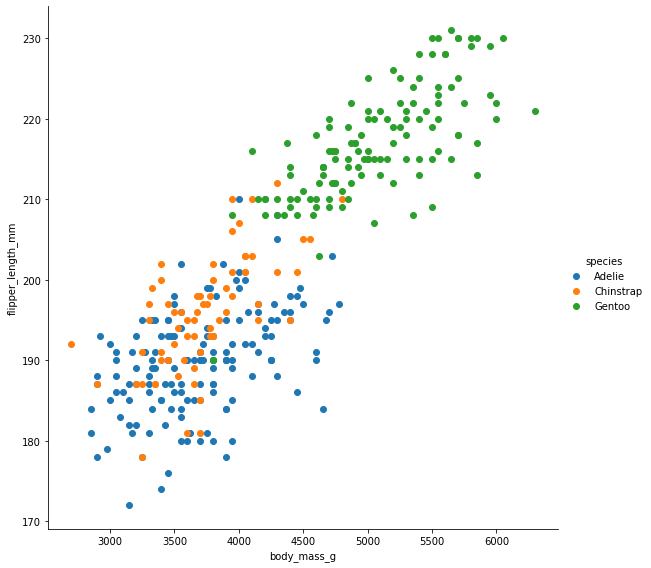

In [ ]:
sns.FacetGrid(penguins, hue="species", size=8) \
   .map(plt.scatter, "body_mass_g", "flipper_length_mm") \
   .add_legend()

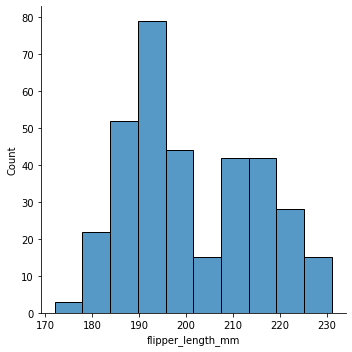

In [ ]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

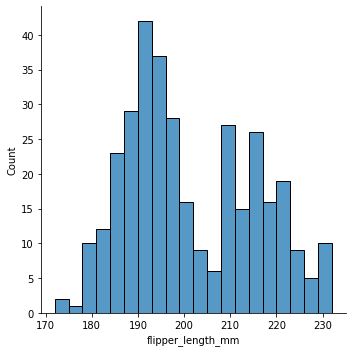

In [ ]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

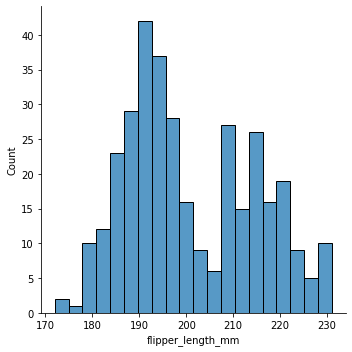

In [ ]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

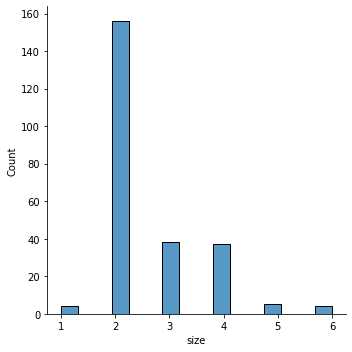

In [ ]:
tips = sns.load_dataset("tips")
sns.displot(tips, x="size")

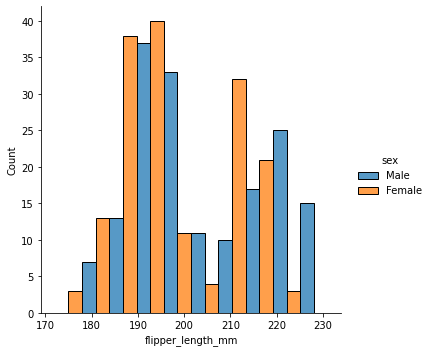

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

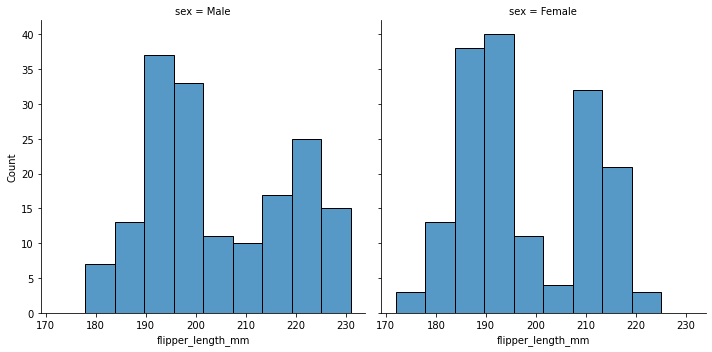

In [ ]:
sns.displot(penguins, x="flipper_length_mm", col="sex")

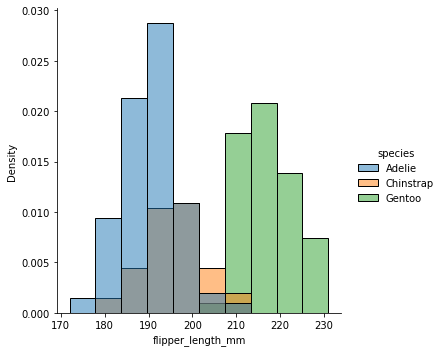

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

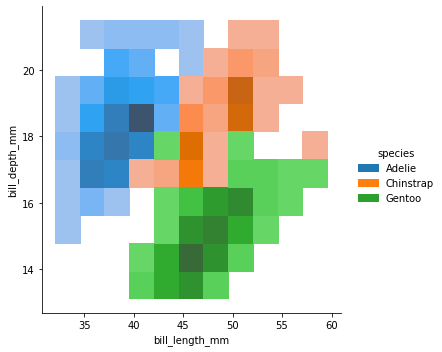

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

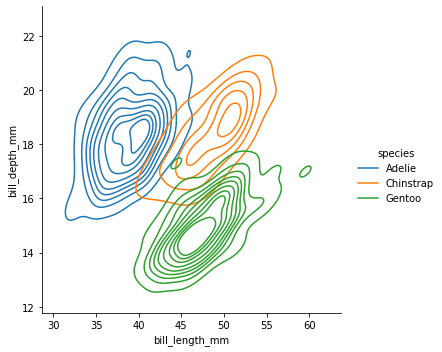

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")